In [54]:
%pylab inline
import numpy as np
from astropy.io import fits 
from __future__ import division 
# Matplotlib default settings
rcdef = plt.rcParams.copy()
pylab.rcParams['figure.figsize'] = 14, 10

import lineid_plot 

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls *.fits 

1st_SDSSJ101827.04+302541.8_rest.fits  3rd_SDSSJ101827.04+302541.8_rest.fits
2nd_SDSSJ101827.04+302541.8_rest.fits  spec-1956-53437-0182.fits


In [4]:
redshift = 0.158

In [5]:
file1 = '1st_SDSSJ101827.04+302541.8_rest.fits' 
file2 = '2nd_SDSSJ101827.04+302541.8_rest.fits'
file3 = '3rd_SDSSJ101827.04+302541.8_rest.fits'
spec1 = fits.open(file1)
spec2 = fits.open(file2)
spec3 = fits.open(file3)

In [6]:
spec1.info()
spec2.info()
spec3.info()

Filename: 1st_SDSSJ101827.04+302541.8_rest.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (6973,)      float32   
Filename: 2nd_SDSSJ101827.04+302541.8_rest.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (6955,)      float32   
Filename: 3rd_SDSSJ101827.04+302541.8_rest.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (6955,)      float32   


In [7]:
flux1 = spec1[0].data
flux2 = spec2[0].data
flux3 = spec3[0].data

In [8]:
head1 = spec1[0].header
head1[0:46]

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 6973 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2015-02-11T00:36:59' / Date FITS file was generated                  
IRAF-TLM= '2015-02-11T00:36:59' / Time of last modification                     
OBJECT  = 'SDSS J101827.04+302541.8' / Name of the object observed              
DROINUM =                    0 / roi number                                     
LOWROW  =                    0 / y min of region                                
LOWCOL  =                    0 / Start col of region of interest                
HIROW   =                 10

In [9]:
head2 = spec2[0].header
head2[25:34]

CTYPE1  = 'LINEAR  '                                                            
CRVAL1  =     7304.60453754707                                                  
CRPIX1  =                   1.                                                  
CDELT1  =     2.08063189308337                                                  
CD1_1   =     2.08063189308337                                                  
NCOMBINE=                  936                                                  
GAINORIG=                   1. / Input gain                                     
RONORIG =                   0. / Input read-noise                               
GAIN    =                  12. /                                                

In [10]:
head3 = spec3[0].header
head3[25:34]

CTYPE1  = 'LINEAR  '                                                            
CRVAL1  =     7304.60453754707                                                  
CRPIX1  =                   1.                                                  
CDELT1  =     2.08063189308337                                                  
CD1_1   =     2.08063189308337                                                  
NCOMBINE=                  936                                                  
GAINORIG=                   1. / Input gain                                     
RONORIG =                   0. / Input read-noise                               
GAIN    =                  12. /                                                

In [11]:
def getWaveArr(header, log=False, showRange=True, Angstrom=True, z=0.00): 
    """
    Return the wavelength array based on the information from header
    
    Make sure that CRVAL1, CRPIX1, CDELT1 or CD1_1 keywords are available 
    
    TODO: Makes LOG wavelength works
    """ 
    waveType = header['CTYPE1']
    
    refPix = header['CRPIX1'] 
    valPix = header['CRVAL1']
    dwvPix = header['CDELT1']
    numPix = header['NAXIS1']
    
    lamda0 = valPix - ((refPix - 1) * dwvPix)
    
    if showRange: 
        if Angstrom: 
            lamUnit = 'Angstrom' 
        else: 
            lamUnit = ' '               
        print "The wavelength coverage is %10.3f to %10.3f %s" % (lamda0/(1.0+z),
                                                                  (lamda0+(numPix*dwvPix))/(1.0+z),
                                                                  lamUnit)
    if z is None: 
        return np.array([lamda0 + (i*dwvPix) for i in range(numPix)])
    else: 
        return (np.array([(lamda0 + (i*dwvPix))/(1.0+z) for i in range(numPix)]))


In [12]:
wave1 = getWaveArr(head1)
wave2 = getWaveArr(head2)
wave3 = getWaveArr(head3)

The wavelength coverage is   7314.437 to  21794.468 Angstrom
The wavelength coverage is   7304.605 to  21775.399 Angstrom
The wavelength coverage is   7304.605 to  21775.399 Angstrom


(7304, 21776)

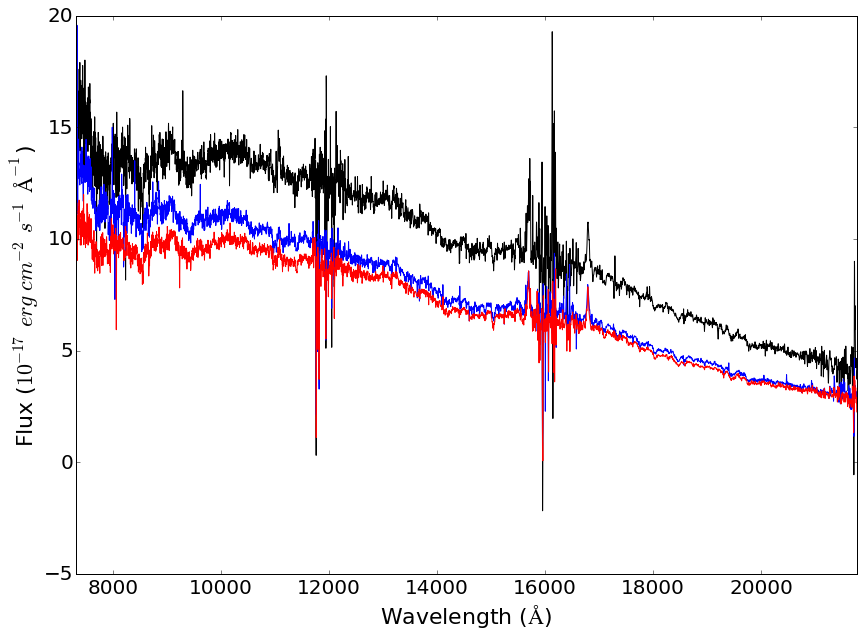

In [13]:
plt.plot(wave1, (flux1/1.0E-17), 'k-')
plt.plot(wave2, (flux2/1.0E-17), 'b-')
plt.plot(wave3, (flux3/1.0E-17), 'r-')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Wavelength ($\AA$)', fontsize=22)
plt.ylabel('Flux ($10^{-17}\ erg\ cm^{-2}\ s^{-1}\ {\AA}^{-1}$)', fontsize=22)

plt.xlim((7304, 21776))

(7304, 21776)

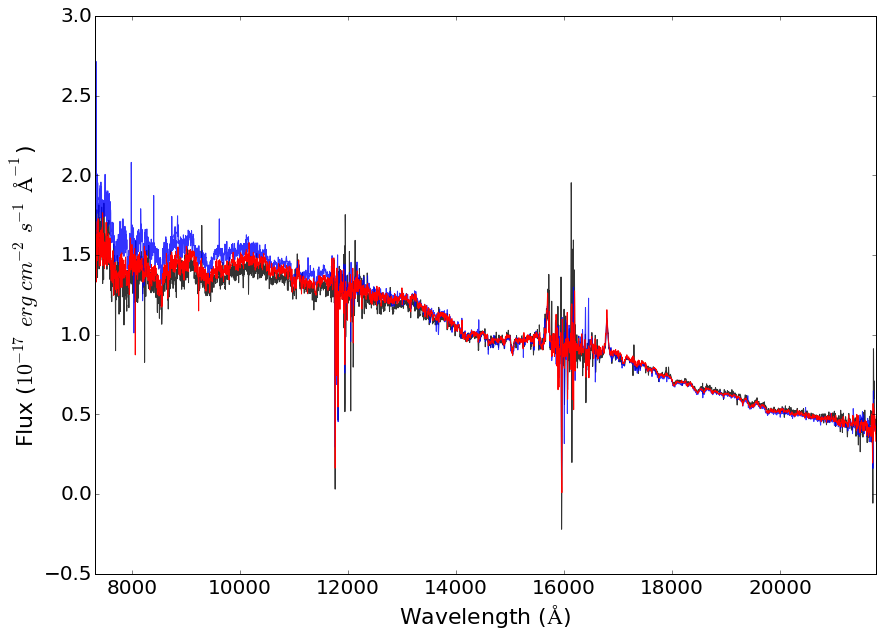

In [14]:
fluxNorm1 = flux1/np.nanmedian(flux1)
fluxNorm2 = flux2/np.nanmedian(flux2)
fluxNorm3 = flux3/np.nanmedian(flux3)

plt.plot(wave1, fluxNorm1, 'k-', alpha=0.8)
plt.plot(wave2, fluxNorm2, 'b-', alpha=0.8)
plt.plot(wave3, fluxNorm3, 'r-')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Wavelength ($\AA$)', fontsize=22)
plt.ylabel('Flux ($10^{-17}\ erg\ cm^{-2}\ s^{-1}\ {\AA}^{-1}$)', fontsize=22)

plt.xlim((7304, 21776))

In [75]:
# Interpolate the spectra into a common wavelength grid
minWaveCommon = np.ceil(np.nanmax([np.min(wave1), np.min(wave2), np.min(wave3)]))
maxWaveCommon = np.floor(np.nanmin([np.max(wave1), np.max(wave2), np.max(wave3)]))
dWave = 2.0 
nWave = np.ceil((maxWaveCommon - minWaveCommon) / dWave)
wCommon = np.arange(nWave) * dWave + minWaveCommon 

fluxInter1 = np.interp(wCommon, wave1, flux1)
fluxInter2 = np.interp(wCommon, wave2, flux2)
fluxInter3 = np.interp(wCommon, wave3, flux3)

In [50]:
def smooth1DSpec(x, window_len=11, window='hanning'):
    """
    smooth the data using a window with requested size.
    Based on: http://wiki.scipy.org/Cookbook/SignalSmooth
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        
    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    
    return y[(window_len/2-1):-(window_len/2)]

In [102]:
def getPlotRange(data, stretch=10.0): 
    
    minPlot = np.nanmin(data)
    maxPlot = np.nanmax(data)
    segPlot = (maxPlot - minPlot) / stretch
    
    minPlot -= segPlot
    maxPlot += segPlot
    
    return minPlot, maxPlot

## Highlight Interesting Wavelength Regions

(<matplotlib.figure.Figure at 0x12df77110>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ca9eb90>)

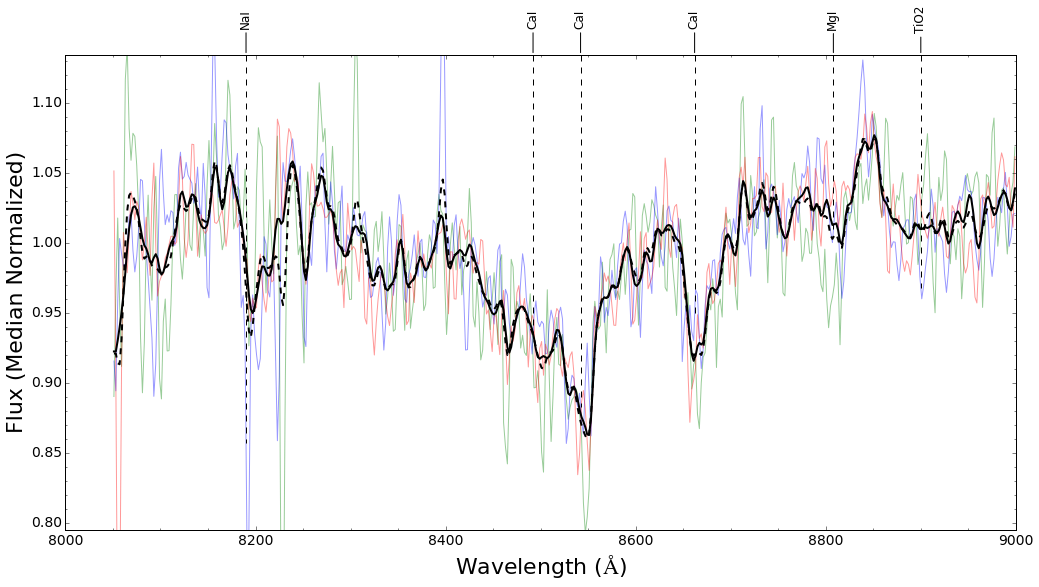

In [128]:
regZoom = np.logical_and((wCommon >= 8050), (wCommon <= 9000))
wReg = wCommon[regZoom]

# Parameter for plot
stretchPlot = 6.0
# Parameter for smooth 
smoothSize = 8.0
smoothType = 'hanning'

# Median normalized the flux
fRegNorm1 = fluxInter1[regZoom]/np.nanmedian(fluxInter1[regZoom])
fRegNorm2 = fluxInter2[regZoom]/np.nanmedian(fluxInter2[regZoom])
fRegNorm3 = fluxInter3[regZoom]/np.nanmedian(fluxInter3[regZoom])

# Overplot some interesting features
lineWave = [8190.0, 8492.0, 8542.0, 8662.0, 8900.0, 8808.0]
lineName = ['NaI',  'CaI',  'CaI',  'CaI',  'TiO2', 'MgI']
lineFlux = np.interp(lineWave, wReg, fRegNorm2)

# A very rough median spectra
fRegNormMedian = np.asarray(map(lambda x: np.nanmedian([fRegNorm1[x], 
                                                        fRegNorm2[x], 
                                                        fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm1[x], 
                                                      fRegNorm2[x], 
                                                      fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMedianSmooth = smooth1DSpec(fRegNormMedian, window_len=smoothSize, 
                                    window=smoothType)
fRegNormMeanSmooth   = smooth1DSpec(fRegNormMean,   window_len=smoothSize, 
                                    window=smoothType)
# Plot
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1, 
                    top=0.95, right=0.95)

ax = gca()
fontsize = 14
ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xlabel('Wavelength ($\AA$)', fontsize=22)
ax.set_ylabel('Flux (Median Normalized)', fontsize=22)

ax.plot(wReg, fRegNorm1, 'g-', alpha=0.4)
ax.plot(wReg, fRegNorm2, 'b-', alpha=0.4)
ax.plot(wReg, fRegNorm3, 'r-', alpha=0.4)

# Just plot the median spectrum
#ax.plot(wReg, fRegNormMedian, 'k-',  linewidth=2.0)
#ax.plot(wReg, fRegNormMean,   'k--', linewidth=2.0)

# Or plot the smoothed version 
ax.plot(wReg, fRegNormMedianSmooth, 'k-',  linewidth=2.0)
ax.plot(wReg, fRegNormMeanSmooth,   'k--', linewidth=2.0)

# Decide the range for plotting
minFluxPlot, maxFluxPlot = getPlotRange(fRegNormMedian, stretch=stretchPlot)
ax.set_ylim((minFluxPlot, maxFluxPlot))

# Overplot line IDs
lineid_plot.plot_line_ids(lineWave, lineFlux, lineWave, lineName, ax=ax)

(<matplotlib.figure.Figure at 0x129758350>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b4661d0>)

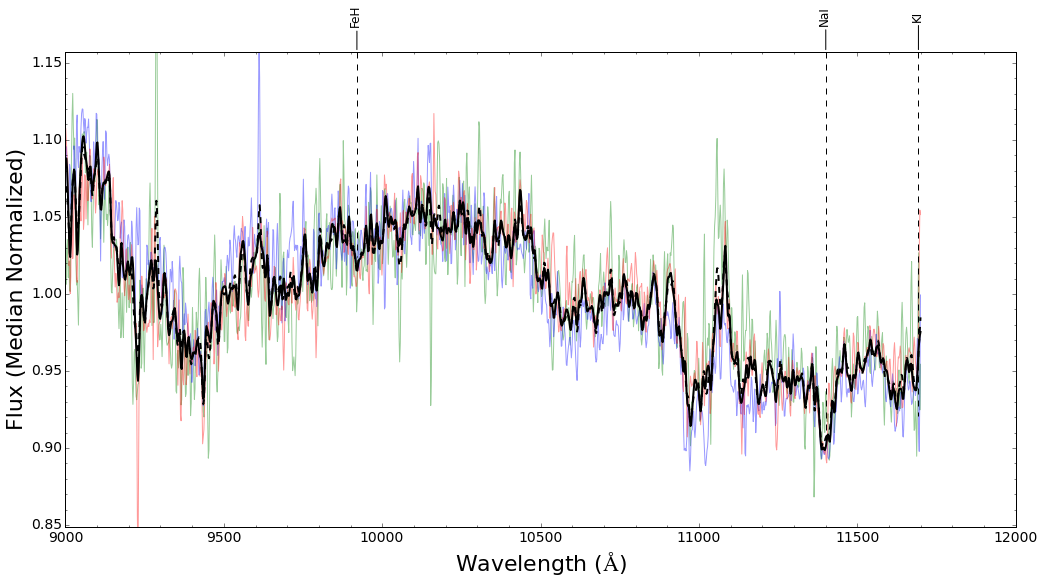

In [122]:
regZoom = np.logical_and((wCommon >= 9000), (wCommon <= 11700))
wReg = wCommon[regZoom]

# Parameter for plot
stretchPlot = 5.0
# Parameter for smooth 
smoothSize = 8.0
smoothType = 'hanning'

# Median normalized the flux
fRegNorm1 = fluxInter1[regZoom]/np.nanmedian(fluxInter1[regZoom])
fRegNorm2 = fluxInter2[regZoom]/np.nanmedian(fluxInter2[regZoom])
fRegNorm3 = fluxInter3[regZoom]/np.nanmedian(fluxInter3[regZoom])

# Overplot some interesting features
lineWave = [9920.0, 11400.0, 11692.5]
lineName = ['FeH',  'NaI',   'KI']
lineFlux = np.interp(lineWave, wReg, fRegNorm2)

# A very rough median spectra
fRegNormMedian = np.asarray(map(lambda x: np.nanmedian([fRegNorm1[x], 
                                                        fRegNorm2[x], 
                                                        fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm1[x], 
                                                      fRegNorm2[x], 
                                                      fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMedianSmooth = smooth1DSpec(fRegNormMedian, window_len=smoothSize, 
                                    window=smoothType)
fRegNormMeanSmooth   = smooth1DSpec(fRegNormMean,   window_len=smoothSize, 
                                    window=smoothType)

# 
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1, 
                    top=0.95, right=0.95)

ax = gca()
fontsize = 14
ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xlabel('Wavelength ($\AA$)', fontsize=22)
ax.set_ylabel('Flux (Median Normalized)', fontsize=22)

ax.plot(wReg, fRegNorm1, 'g-', alpha=0.4)
ax.plot(wReg, fRegNorm2, 'b-', alpha=0.4)
ax.plot(wReg, fRegNorm3, 'r-', alpha=0.4)

# Just plot the median spectrum
#ax.plot(wReg, fRegNormMedian, 'k-',  linewidth=2.0)
#ax.plot(wReg, fRegNormMean,   'k--', linewidth=2.0)

# Or plot the smoothed version 
ax.plot(wReg, fRegNormMedianSmooth, 'k-',  linewidth=2.0)
ax.plot(wReg, fRegNormMeanSmooth,   'k--', linewidth=2.0)

# Decide the range for plotting
minFluxPlot, maxFluxPlot = getPlotRange(fRegNormMedian, stretch=stretchPlot)
ax.set_ylim((minFluxPlot, maxFluxPlot))

# Overplot line IDs
lineid_plot.plot_line_ids(lineWave, lineFlux, lineWave, lineName, ax=ax)

(<matplotlib.figure.Figure at 0x115fac210>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12baae290>)

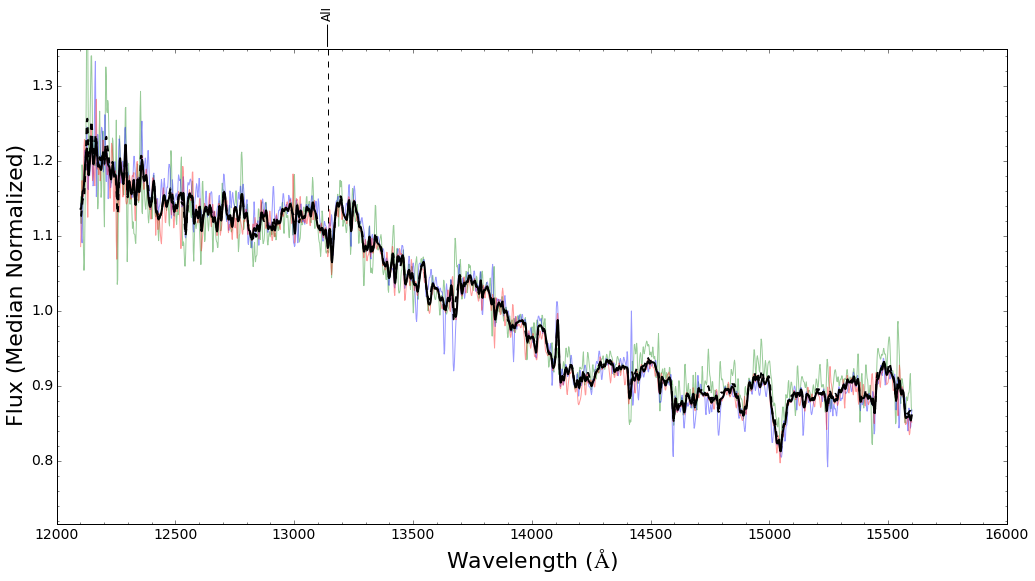

In [123]:
regZoom = np.logical_and((wCommon >= 12100.0), (wCommon <= 15600.0))
wReg = wCommon[regZoom]

# Parameter for plot
stretchPlot = 5.0
# Parameter for smooth 
smoothSize = 8.0
smoothType = 'hanning'

# Median normalized the flux
fRegNorm1 = fluxInter1[regZoom]/np.nanmedian(fluxInter1[regZoom])
fRegNorm2 = fluxInter2[regZoom]/np.nanmedian(fluxInter2[regZoom])
fRegNorm3 = fluxInter3[regZoom]/np.nanmedian(fluxInter3[regZoom])

# Overplot some interesting features
lineWave = [13140.0]
lineName = ['AlI']
lineFlux = np.interp(lineWave, wReg, fRegNorm2)

# A very rough median spectra
fRegNormMedian = np.asarray(map(lambda x: np.nanmedian([fRegNorm1[x], 
                                                        fRegNorm2[x], 
                                                        fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm1[x], 
                                                      fRegNorm2[x], 
                                                      fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMedianSmooth = smooth1DSpec(fRegNormMedian, window_len=smoothSize, 
                                    window=smoothType)
fRegNormMeanSmooth   = smooth1DSpec(fRegNormMean,   window_len=smoothSize, 
                                    window=smoothType)
# 
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1, 
                    top=0.95, right=0.95)

ax = gca()
fontsize = 14
ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xlabel('Wavelength ($\AA$)', fontsize=22)
ax.set_ylabel('Flux (Median Normalized)', fontsize=22)

ax.plot(wReg, fRegNorm1, 'g-', alpha=0.4)
ax.plot(wReg, fRegNorm2, 'b-', alpha=0.4)
ax.plot(wReg, fRegNorm3, 'r-', alpha=0.4)

# Just plot the median spectrum
#ax.plot(wReg, fRegNormMedian, 'k-',  linewidth=2.0)
#ax.plot(wReg, fRegNormMean,   'k--', linewidth=2.0)

# Or plot the smoothed version 
ax.plot(wReg, fRegNormMedianSmooth, 'k-',  linewidth=2.0)
ax.plot(wReg, fRegNormMeanSmooth,   'k--', linewidth=2.0)

# Decide the range for plotting
minFluxPlot, maxFluxPlot = getPlotRange(fRegNormMedian, stretch=stretchPlot)
ax.set_ylim((minFluxPlot, maxFluxPlot))

# Overplot line IDs
lineid_plot.plot_line_ids(lineWave, lineFlux, lineWave, lineName, ax=ax)

(<matplotlib.figure.Figure at 0x11fe716d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1177a8cd0>)

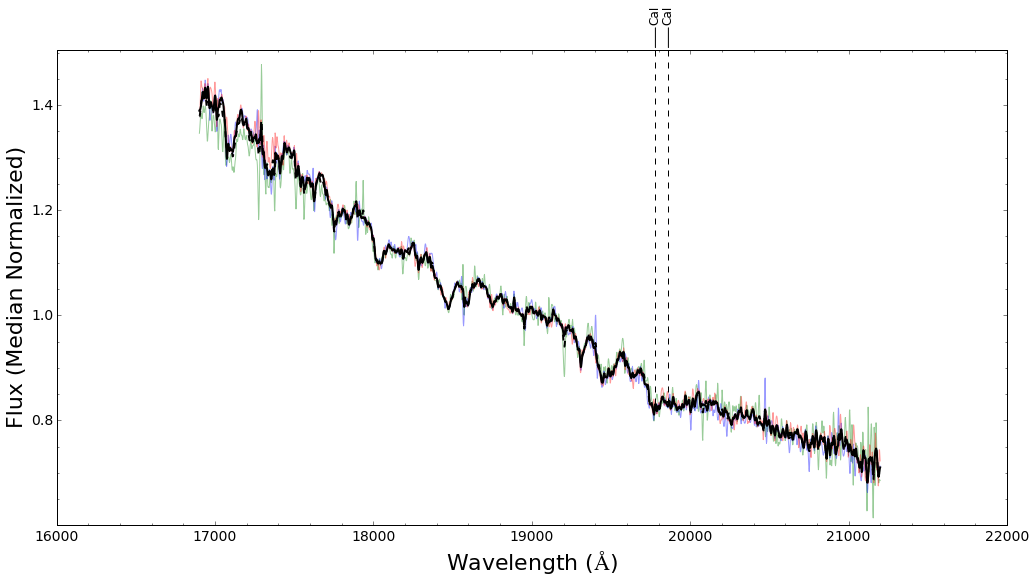

In [124]:
regZoom = np.logical_and((wCommon >= 16900.0), (wCommon <= 21200.0))
wReg = wCommon[regZoom]

# Parameter for plot
stretchPlot = 12.0
# Parameter for smooth 
smoothSize = 8.0
smoothType = 'hanning'

# Median normalized the flux
fRegNorm1 = fluxInter1[regZoom]/np.nanmedian(fluxInter1[regZoom])
fRegNorm2 = fluxInter2[regZoom]/np.nanmedian(fluxInter2[regZoom])
fRegNorm3 = fluxInter3[regZoom]/np.nanmedian(fluxInter3[regZoom])

# Overplot some interesting features
lineWave = [19780.0, 19862.0]
lineName = ['CaI',   'CaI']
lineFlux = np.interp(lineWave, wReg, fRegNorm2)

# A very rough median spectra
fRegNormMedian = np.asarray(map(lambda x: np.nanmedian([fRegNorm1[x], 
                                                        fRegNorm2[x], 
                                                        fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm1[x], 
                                                      fRegNorm2[x], 
                                                      fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMedianSmooth = smooth1DSpec(fRegNormMedian, window_len=smoothSize, 
                                    window=smoothType)
fRegNormMeanSmooth   = smooth1DSpec(fRegNormMean,   window_len=smoothSize, 
                                    window=smoothType)
# 
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1, 
                    top=0.95, right=0.95)

ax = gca()
fontsize = 14
ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xlabel('Wavelength ($\AA$)', fontsize=22)
ax.set_ylabel('Flux (Median Normalized)', fontsize=22)

ax.plot(wReg, fRegNorm1, 'g-', alpha=0.4)
ax.plot(wReg, fRegNorm2, 'b-', alpha=0.4)
ax.plot(wReg, fRegNorm3, 'r-', alpha=0.4)

# Just plot the median spectrum
#ax.plot(wReg, fRegNormMedian, 'k-',  linewidth=2.0)
#ax.plot(wReg, fRegNormMean,   'k--', linewidth=2.0)

# Or plot the smoothed version 
ax.plot(wReg, fRegNormMedianSmooth, 'k-',  linewidth=2.0)
ax.plot(wReg, fRegNormMeanSmooth,   'k--', linewidth=2.0)

# Decide the range for plotting
minFluxPlot, maxFluxPlot = getPlotRange(fRegNormMedian, stretch=stretchPlot)
ax.set_ylim((minFluxPlot, maxFluxPlot))

# Overplot line IDs
lineid_plot.plot_line_ids(lineWave, lineFlux, lineWave, lineName, ax=ax)

(<matplotlib.figure.Figure at 0x12c6e5650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e5a51d0>)

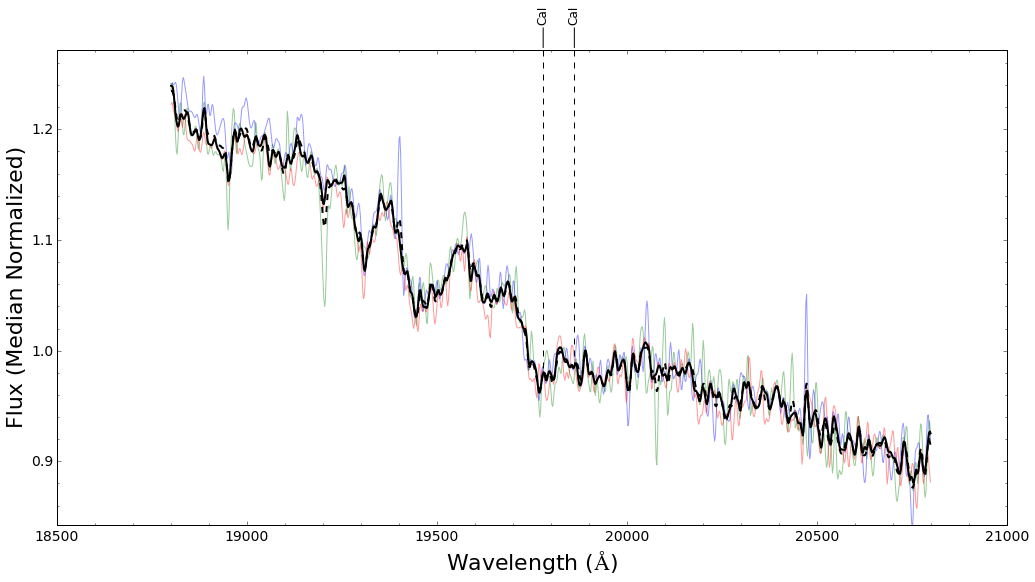

In [125]:
regZoom = np.logical_and((wCommon >= 18800.0), (wCommon <= 20800.0))
wReg = wCommon[regZoom]

# Parameter for plot
stretchPlot = 12.0
# Parameter for smooth 
smoothSize = 8.0
smoothType = 'hanning'

# Median normalized the flux
fRegNorm1 = fluxInter1[regZoom]/np.nanmedian(fluxInter1[regZoom])
fRegNorm2 = fluxInter2[regZoom]/np.nanmedian(fluxInter2[regZoom])
fRegNorm3 = fluxInter3[regZoom]/np.nanmedian(fluxInter3[regZoom])

# Overplot some interesting features
lineWave = [19780.0, 19862.0]
lineName = ['CaI',   'CaI']
lineFlux = np.interp(lineWave, wReg, fRegNorm2)

# A very rough median spectra
fRegNormMedian = np.asarray(map(lambda x: np.nanmedian([fRegNorm1[x], 
                                                        fRegNorm2[x], 
                                                        fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm1[x], 
                                                      fRegNorm2[x], 
                                                      fRegNorm3[x]]), 
                                range(fRegNorm1.shape[0])))

fRegNormMedianSmooth = smooth1DSpec(fRegNormMedian, window_len=smoothSize, 
                                    window=smoothType)
fRegNormMeanSmooth   = smooth1DSpec(fRegNormMean,   window_len=smoothSize, 
                                    window=smoothType)
# 
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1, 
                    top=0.95, right=0.95)

ax = gca()
fontsize = 14
ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xlabel('Wavelength ($\AA$)', fontsize=22)
ax.set_ylabel('Flux (Median Normalized)', fontsize=22)

ax.plot(wReg, fRegNorm1, 'g-', alpha=0.4)
ax.plot(wReg, fRegNorm2, 'b-', alpha=0.4)
ax.plot(wReg, fRegNorm3, 'r-', alpha=0.4)

# Just plot the median spectrum
#ax.plot(wReg, fRegNormMedian, 'k-',  linewidth=2.0)
#ax.plot(wReg, fRegNormMean,   'k--', linewidth=2.0)

# Or plot the smoothed version 
ax.plot(wReg, fRegNormMedianSmooth, 'k-',  linewidth=2.0)
ax.plot(wReg, fRegNormMeanSmooth,   'k--', linewidth=2.0)

# Decide the range for plotting
minFluxPlot, maxFluxPlot = getPlotRange(fRegNormMedian, stretch=stretchPlot)
ax.set_ylim((minFluxPlot, maxFluxPlot))

# Overplot line IDs
lineid_plot.plot_line_ids(lineWave, lineFlux, lineWave, lineName, ax=ax)

(<matplotlib.figure.Figure at 0x12d3d5710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1199c0310>)

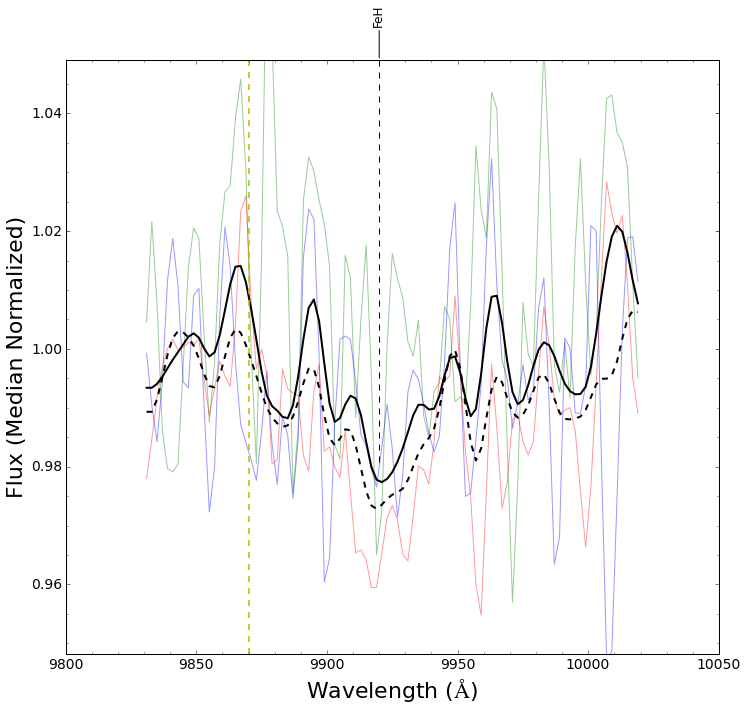

In [126]:
regZoom = np.logical_and((wCommon >= 9830.0), (wCommon <= 10020.0))
wReg  = wCommon[regZoom]
# Separate normalization wavelength window
regNorm = np.logical_and((wCommon >= 9840.0), (wCommon <= 9860.0))
wNorm = wCommon[regNorm]

# Parameter for plot
stretchPlot = 4.0
# Parameter for smooth 
smoothSize = 10.0
smoothType = 'hanning'

# Median normalized the flux
fRegNorm1 = fluxInter1[regZoom]/np.nanmedian(fluxInter1[regNorm])
fRegNorm2 = fluxInter2[regZoom]/np.nanmedian(fluxInter2[regNorm])
fRegNorm3 = fluxInter3[regZoom]/np.nanmedian(fluxInter3[regNorm])

# Overplot some interesting features
lineWave = [9920.0]
lineName = ['FeH']
lineFlux = np.interp(lineWave, wReg, fRegNorm2)

# A very rough median spectra
fRegNormMedian = np.asarray(map(lambda x: np.nanmedian([fRegNorm1[x], 
                                                        fRegNorm2[x], 
                                                        fRegNorm3[x]]), 
                                range(fRegNorm2.shape[0])))

#fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm1[x], 
#                                                      fRegNorm2[x], 
#                                                      fRegNorm3[x]]), 
#                                range(fRegNorm2.shape[0])))
fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm2[x], 
                                                      fRegNorm3[x]]), 
                                range(fRegNorm2.shape[0])))

fRegNormMedianSmooth = smooth1DSpec(fRegNormMedian, window_len=smoothSize, 
                                    window=smoothType)
fRegNormMeanSmooth   = smooth1DSpec(fRegNormMean,   window_len=smoothSize, 
                                    window=smoothType)

# 
fig = plt.figure(figsize=(11, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1, 
                    top=0.95, right=0.95)

ax = gca()
fontsize = 14
ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xlabel('Wavelength ($\AA$)', fontsize=22)
ax.set_ylabel('Flux (Median Normalized)', fontsize=22)

ax.plot(wReg, fRegNorm1, 'g-', alpha=0.4)
ax.plot(wReg, fRegNorm2, 'b-', alpha=0.4)
ax.plot(wReg, fRegNorm3, 'r-', alpha=0.4)

# Just plot the median spectrum
#ax.plot(wReg, fRegNormMedian, 'k-',  linewidth=2.0)
#ax.plot(wReg, fRegNormMean,   'k--', linewidth=2.0)

# Or plot the smoothed version 
ax.plot(wReg, fRegNormMedianSmooth, 'k-',  linewidth=2.0)
ax.plot(wReg, fRegNormMeanSmooth,   'k--', linewidth=2.0)

# Decide the range for plotting
minFluxPlot, maxFluxPlot = getPlotRange(fRegNormMedian, stretch=stretchPlot)
ax.set_ylim((minFluxPlot, maxFluxPlot))

ax.axvline(9870.0, linestyle='--', color='y', alpha=0.8, linewidth=2.0)

# Overplot line IDs
lineid_plot.plot_line_ids(lineWave, lineFlux, lineWave, lineName, ax=ax)

(<matplotlib.figure.Figure at 0x12da9db50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1177a8450>)

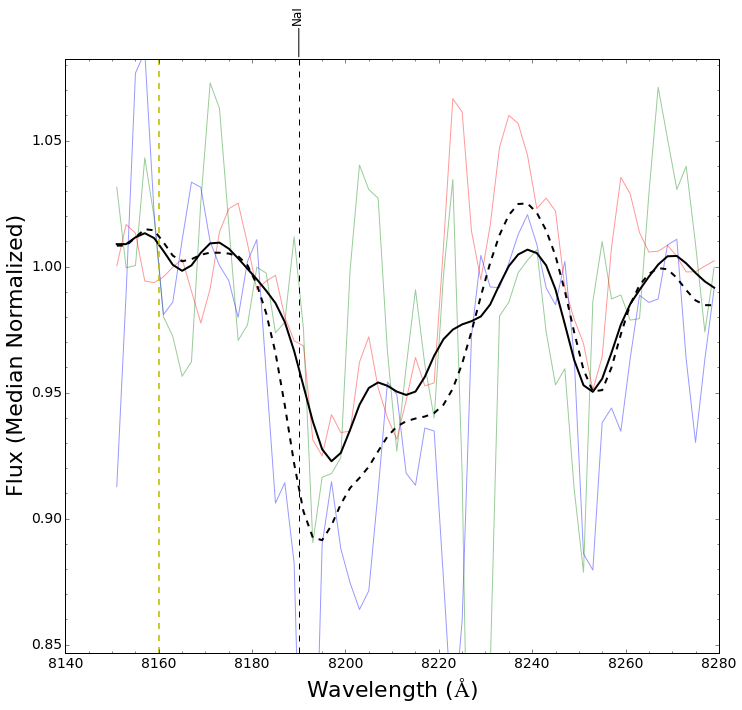

In [127]:
regZoom = np.logical_and((wCommon >= 8150.0), (wCommon <= 8280.0))
wReg  = wCommon[regZoom]
# Separate normalization wavelength window
regNorm = np.logical_and((wCommon >= 8150.0), (wCommon <= 8165.0))
wNorm = wCommon[regNorm]

# Parameter for plot
stretchPlot = 4.0
# Parameter for smooth 
smoothSize = 10.0
smoothType = 'hanning'

# Median normalized the flux
fRegNorm1 = fluxInter1[regZoom]/np.nanmedian(fluxInter1[regNorm])
fRegNorm2 = fluxInter2[regZoom]/np.nanmedian(fluxInter2[regNorm])
fRegNorm3 = fluxInter3[regZoom]/np.nanmedian(fluxInter3[regNorm])

# Overplot some interesting features
lineWave = [8190.0]
lineName = ['NaI']
lineFlux = np.interp(lineWave, wReg, fRegNorm2)

# A very rough median spectra
fRegNormMedian = np.asarray(map(lambda x: np.nanmedian([fRegNorm1[x], 
                                                        fRegNorm2[x], 
                                                        fRegNorm3[x]]), 
                                range(fRegNorm2.shape[0])))

#fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm1[x], 
#                                                      fRegNorm2[x], 
#                                                      fRegNorm3[x]]), 
#                                range(fRegNorm2.shape[0])))
fRegNormMean   = np.asarray(map(lambda x: np.nanmean([fRegNorm2[x], 
                                                      fRegNorm3[x]]), 
                                range(fRegNorm2.shape[0])))

fRegNormMedianSmooth = smooth1DSpec(fRegNormMedian, window_len=smoothSize, 
                                    window=smoothType)
fRegNormMeanSmooth   = smooth1DSpec(fRegNormMean,   window_len=smoothSize, 
                                    window=smoothType)

# 
fig = plt.figure(figsize=(11, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1, 
                    top=0.95, right=0.95)

ax = gca()
fontsize = 14
ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

ax.set_xlabel('Wavelength ($\AA$)', fontsize=22)
ax.set_ylabel('Flux (Median Normalized)', fontsize=22)

ax.plot(wReg, fRegNorm1, 'g-', alpha=0.4)
ax.plot(wReg, fRegNorm2, 'b-', alpha=0.4)
ax.plot(wReg, fRegNorm3, 'r-', alpha=0.4)

# Just plot the median spectrum
#ax.plot(wReg, fRegNormMedian, 'k-',  linewidth=2.0)
#ax.plot(wReg, fRegNormMean,   'k--', linewidth=2.0)

# Or plot the smoothed version 
ax.plot(wReg, fRegNormMedianSmooth, 'k-',  linewidth=2.0)
ax.plot(wReg, fRegNormMeanSmooth,   'k--', linewidth=2.0)

# Decide the range for plotting
minFluxPlot, maxFluxPlot = getPlotRange(fRegNormMedian, stretch=stretchPlot)
ax.set_ylim((minFluxPlot, maxFluxPlot))

ax.axvline(8160.0, linestyle='--', color='y', alpha=0.8, linewidth=2.0)

# Overplot line IDs
lineid_plot.plot_line_ids(lineWave, lineFlux, lineWave, lineName, ax=ax)